# Project 2 - Comcast Telecom Consumer Complaints

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

### 1. Import data into Pyton environment

In [2]:
# Import data
df_complaints = pd.read_csv('Comcast_telecom_complaints_data.csv')
df_complaints.shape

(2224, 11)

In [3]:
# Explore data
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### 2. Provide the trend chart for the number of complaints at monthly and daily granularity levels

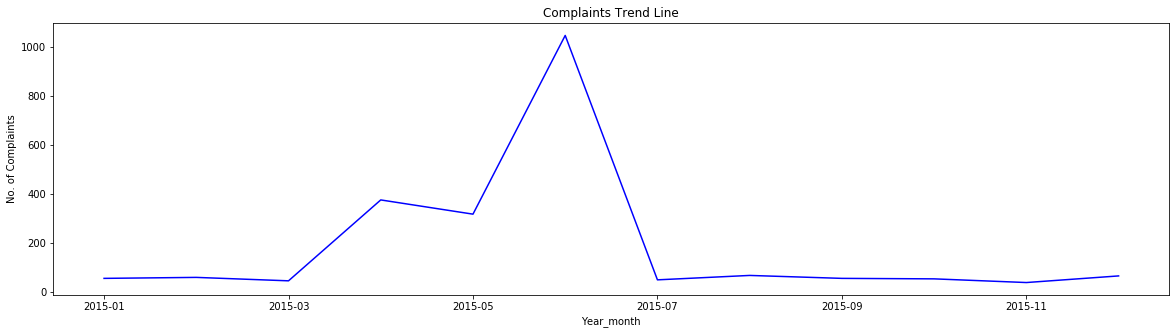

In [4]:
# Plot trend chart for number of complaints at monthly level
plt.figure(figsize=(20,5))
df_complaints['Date_month_year'] = pd.to_datetime(df_complaints['Date_month_year'])
df_complaints['Year_month'] = df_complaints['Date_month_year'].map(lambda x: x.strftime('%Y') + '-' + x.strftime('%m'))
grp_monthly = df_complaints.groupby('Year_month')
grp_monthly.size().plot(color='b')

plt.ylabel('No. of Complaints')
plt.title('Complaints Trend Line')
plt.show()

In [5]:
# Analysis: Large amount of complaints came in around may-jul 2015 which worth further looking into

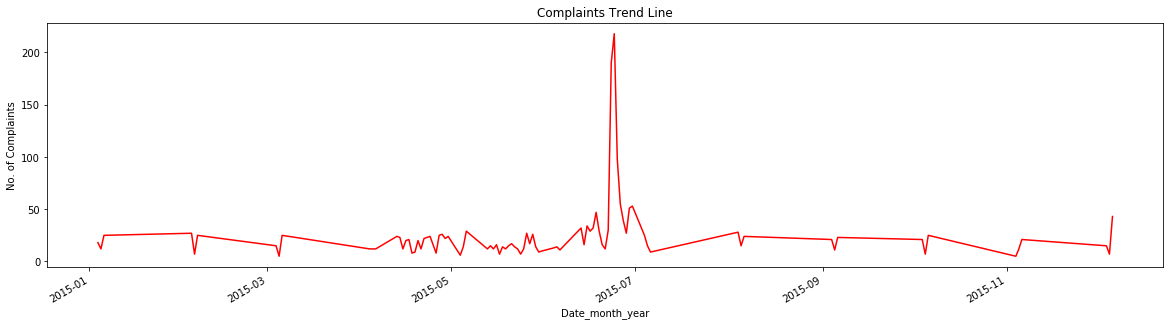

In [6]:
# Plot trend chart for number of complaints at daily level
plt.figure(figsize=(20, 5))
grp_daily = df_complaints.groupby('Date_month_year')
grp_daily.size().plot(color='r')

plt.ylabel('No. of Complaints')
plt.title('Complaints Trend Line')
plt.show()

In [7]:
# Analysis: Large amount of complaints came in around Jun-Jul 2015, and sorting the data to obtain accurate dates

In [8]:
grp_daily.size().sort_values(ascending=False).head()

Date_month_year
2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
dtype: int64

In [9]:
# Analysis: Daily trend shows that the complaints spiked around 23rd to 25th Jun 2015

### 3. Provide a table with the frequency of complaint types

In [10]:
df_complaints[['Customer Complaint','Received Via']].describe()

,Customer Complaint,Received Via
count,2224,2224
unique,1841,2
top,Comcast,Customer Care Call
freq,83,1119


In [11]:
grp_complaints = df_complaints.groupby('Customer Complaint').size()
grp_complaints.sort_values(ascending = False).head(10)

Customer Complaint
Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Data Caps           11
Comcast Billing             11
Data Caps                   11
Unfair Billing Practices     9
Comcast/Xfinity              8
Comcast internet             8
dtype: int64

In [12]:
# Analysis: The complaint field is free text, which needs to be categorized first

### 4. Which complaint types are maximum i.e., around internet, network issues, or across any other domains

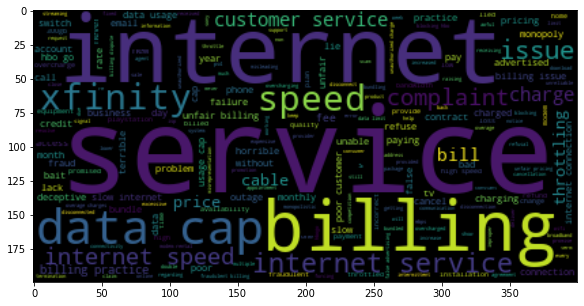

In [13]:
from wordcloud import WordCloud
# Remove comcast key word which high frequency but not useful in providing any info
sr_complaints = df_complaints['Customer Complaint'].str.lower().str.replace("comcast", "")

# Use word cloud to understand which complaint types appear most frequently
str_complaints = ' '.join([word for word in sr_complaints])
wordcloud = WordCloud().generate(str_complaints)
    
plt.figure(figsize=(20,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

In [14]:
#Analysis, the key categories are internet, service, billing, network speed etc.

### 5. Create a new categorical variable with value as Open and Closed

In [15]:
# Check if there is any missing value
df_complaints['Status'].isnull().values.any()

False

In [16]:
# Open and Pending is to be categorized as Open, and Closed & Solved is to be categorized as Closed
df_complaints['Final Status'] = df_complaints['Status'].map(lambda s: 'Closed' if (s in ('Closed', 'Solved')) else 'Open')
df_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year_month,Final Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05,Closed


### 6. Provide state wise status of complaints in a staked bar chart using the categorized variable above

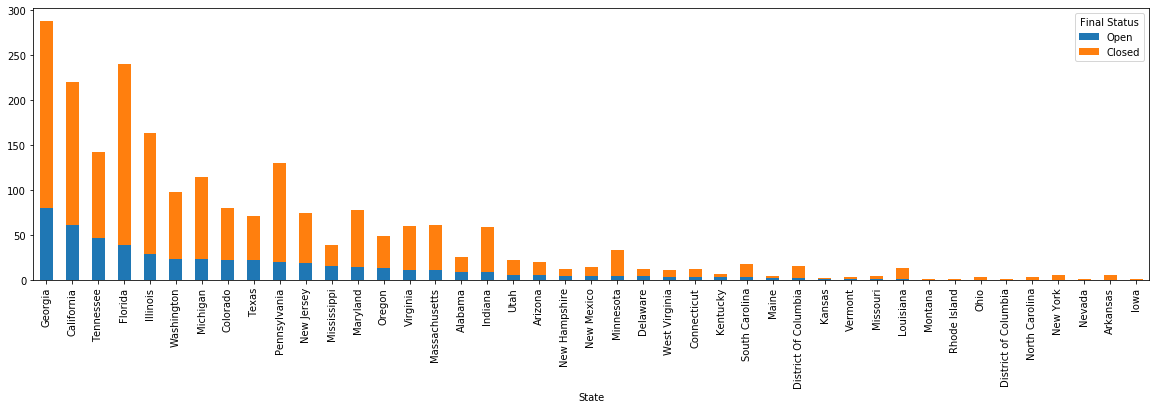

In [17]:
df_state_status = df_complaints.pivot_table(values='Ticket #', index='State', columns='Final Status', aggfunc='count', fill_value=0)
df_state_status = df_state_status.sort_values(['Open'], ascending=False)
df_state_status = df_state_status.reindex(['Open', 'Closed'], axis=1)
df_state_status.plot(kind='bar', stacked=True, figsize=(20,5))
plt.show()

### 7. Which state has the maximum complaints

In [18]:
# Geogia has the maximum complaints
df_state_status['All'] = df_state_status['Open'] + df_state_status['Closed']
print(df_state_status.iloc[df_state_status['All'].argmax()])

Final Status
Open       80
Closed    208
All       288
Name: Georgia, dtype: int64


### 8. Which state has the highest percentage of unresolved complaints

In [19]:
# Kansas has the highest percentage of unresolved complaints, but no. of complaints is small
df_state_status['Pct_Open'] = df_state_status['Open']/df_state_status['All']
print(df_state_status.iloc[df_state_status['Pct_Open'].argmax()])

Final Status
Open        1.0
Closed      1.0
All         2.0
Pct_Open    0.5
Name: Kansas, dtype: float64


### 9. Provide the percentage of complaints resovled till date, which were received through the Internet and customer care calls

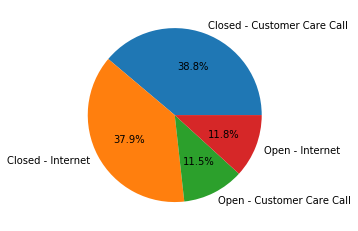

In [20]:
df_complaints['Channel Status'] = df_complaints['Final Status'] + ' - ' + df_complaints['Received Via']
#df_closed = df_complaints[df_complaints['Final Status']=='Closed'].groupby('Received Via').size()
df_channel_status = df_complaints.groupby('Channel Status').size()
plt.pie(df_channel_status, labels=df_channel_status.index, autopct='%1.1f%%')
plt.show()

In [21]:
# Analysis: Total resolved is 76.7%, of which 38.8% from call and 37.9% from Internet.

### 10. The analysis results to be provided with inisghts wherever applicable

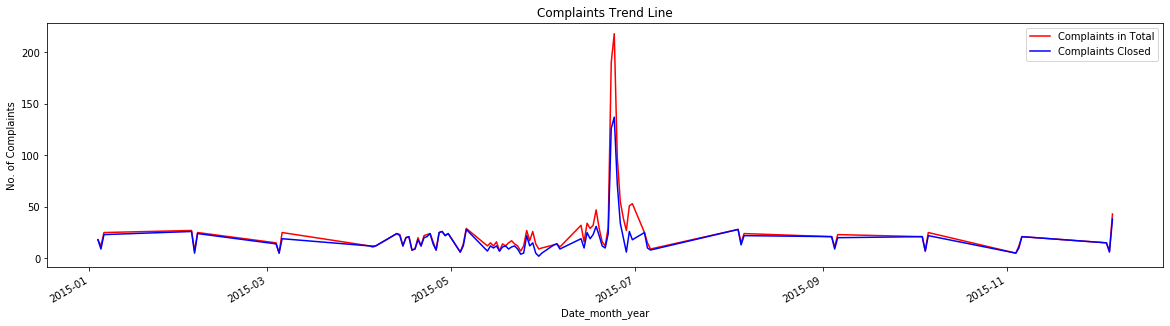

In [22]:
# Plot trend chart for number of complaints at daily level
plt.figure(figsize=(20, 5))
grp_daily = df_complaints.groupby('Date_month_year').size()
grp_daily.plot(color='r', label='Complaints in Total', legend=True)

grp_daily_closed = df_complaints[df_complaints['Final Status']=='Closed'].groupby('Date_month_year').size()
grp_daily_closed.plot(color='b', label ='Complaints Closed', legend=True)

plt.ylabel('No. of Complaints')
plt.title('Complaints Trend Line')
plt.show()

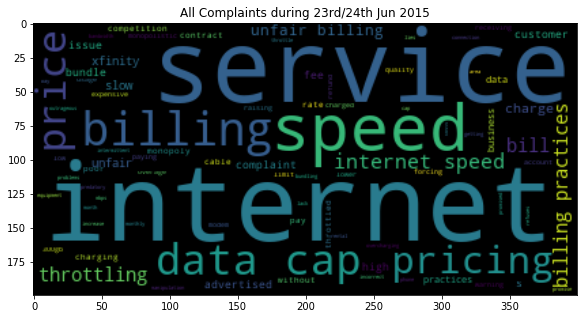

In [23]:
# Analysis: This shows that Unresovled complaints are mainly due to the spike around 23rd-24th Jun 2015

# To analyze only the spike only
df_spike = df_complaints[df_complaints['Date'].isin(['23-06-15', '24-06-15'])]
sr_spike = df_spike['Customer Complaint'].str.lower().str.replace("comcast", "")

# Use word cloud to understand which complaint types appear most frequently
str_spike = ' '.join([word for word in sr_spike])
wordcloud_spike = WordCloud().generate(str_spike)
    
plt.figure(figsize=(20,5))
plt.imshow(wordcloud_spike, interpolation = 'bilinear')
plt.title('All Complaints during 23rd/24th Jun 2015')
plt.show()

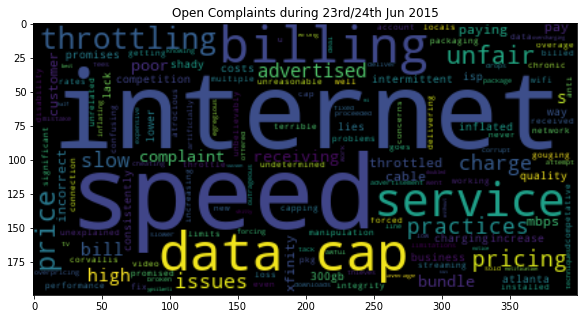

In [24]:
# To analyze only the complaints that are still open during the spike
df_spike_open = df_complaints[df_complaints['Date'].isin(['23-06-15', '24-06-15']) & (df_complaints['Final Status']=='Open')]
sr_spike_open = df_spike_open['Customer Complaint'].str.lower().str.replace("comcast", "")

# Use word cloud to understand which complaint types appear most frequently
str_spike_open = ' '.join([word for word in sr_spike_open])
wordcloud_spike_open = WordCloud().generate(str_spike_open)
    
plt.figure(figsize=(20,5))
plt.imshow(wordcloud_spike_open, interpolation = 'bilinear')
plt.title('Open Complaints during 23rd/24th Jun 2015')
plt.show()

In [25]:
# Analysis: By comparing these 2 word clouds, it is observed that a few complaint types that remained
# unresolved is around 'slow' 'speed' in Internet, 'unfair' 'practices', some are due to which likely
# customers believe is due to throttling. Such complaints may not be able to be addressed easily.
# However, we could observe that the the spike during these 2 days is mainly due to Internet issue.